<a href="https://colab.research.google.com/github/xie186/Coursera_StatisticsWithPython/blob/master/StatisticsWithPython_CourseraCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and Visualizing Data with Python

## UNIVARIATE DATA

### Quantitative data: Histograms

#### Quantititave data


* What are quantitiative variables


Variables that have a numerical value (quantity) thant we can perform mathematical operations on. 

__Examples__: 

* Continuous values: Height, weight, income, test scores, shoes size, 

* Discrete: number of "heads" after 10 coin flips

![](https://user-images.githubusercontent.com/20909751/56850116-e91aac80-68cb-11e9-9ea0-ea1612b9f5fd.png)

### Four main aspects of Histogram

* __Shape__: Overall appearance of historgram

* __Center__: Mean or Median

* __Spead__: How far our data speads. Range, Interquartile Range (IQR), standard deviation, variance.


* __Ourliers__: Data points that fall far from the bulk of the data


## MULTIVARIATE DATA

In the third week of this course on looking at data, we’ll introduce key ideas for examining research questions that require looking at more than one variable. In particular, we will consider both numerically and visually how different variables interact, how summaries can appear deceiving if you don’t properly account for interactions, and differences between quantitative and categorical variables. This week’s assignment will consist of a writing assignment along with reviewing those of your peers.



*italicized text ![alt text](https://)*### Simpons paradox

Simpson's paradox  is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

*italicized text*#### Example: UC Berkeley gender bias

One of the best-known examples of Simpson's paradox is a study of gender bias among graduate school admissions to University of California, Berkeley. The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance.


In [0]:
import pandas as pd
file = 'https://raw.githubusercontent.com/xie186/Coursera_StatisticsWithPython/master/data/UCBGradAdmData1973.csv'
df = pd.DataFrame(pd.read_csv(file))
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


##### Gender bias 

The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance.

In [0]:
import numpy as np
df_sum = pd.pivot_table(df, values="Freq", index=["Gender"], 
                          columns=["Admit"], aggfunc=np.sum)

df_sum["%"] = 100*df_sum["Admitted"] / (df_sum["Admitted"] + df_sum["Rejected"])
df_sum

Admit,Admitted,Rejected,%
Gender,,,
Female,557,1278,30.354223
Male,1198,1493,44.518766


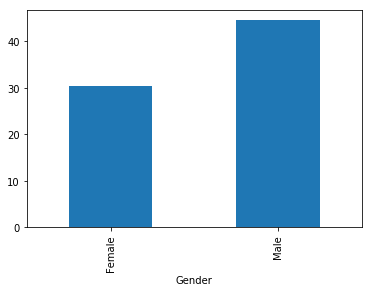

In [0]:
df_sum["%"].plot(kind="bar", y="%")

##### Department level summary

When examining the individual departments, it appeared that six out of 85 departments were significantly biased against men, whereas only four were significantly biased against women. In fact, the pooled and corrected data showed a "small but statistically significant bias in favor of women".[15] The data from the six largest departments are listed below, the top two departments by number of applicants for each gender italicised.

In [0]:
df_pivot = df.pivot_table(values="Freq", index=["Dept"], 
                          columns=["Gender", "Admit"])

df_pivot["%(Female)"] = 100*df_pivot["Female"]["Admitted"]/(df_pivot["Female"]["Rejected"] + df_pivot["Female"]["Admitted"])
df_pivot["%(Male)"] = 100*df_pivot["Male"]["Admitted"]/(df_pivot["Male"]["Rejected"] + df_pivot["Male"]["Admitted"])
df_pivot


Gender   Female              Male           %(Female)    %(Male)
Admit  Admitted Rejected Admitted Rejected                      
Dept                                                            
A            89       19      512      313  82.407407  62.060606
B            17        8      353      207  68.000000  63.035714
C           202      391      120      205  34.064081  36.923077
D           131      244      138      279  34.933333  33.093525
E            94      299       53      138  23.918575  27.748691
F            24      317       22      351   7.038123   5.898123

MultiIndex(levels=[['Female', 'Male', '%(Female)', '%(Male)'], ['Admitted', 'Rejected', '']],
           codes=[[2, 3], [2, 2]],
           names=['Gender', 'Admit'])
Index(['%(Female)', '%(Male)'], dtype='object')


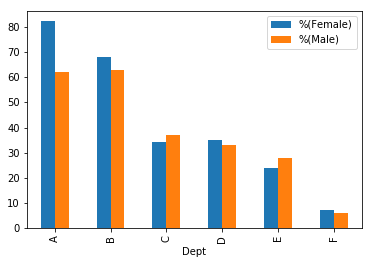

In [0]:
df_perc = df_pivot[["%(Female)",	"%(Male)"]]
print(df_perc.columns)
df_perc.columns = ['%(Female)', '%(Male)']
print(df_perc.columns)
df_perc
df_perc.plot(kind="bar")

The research paper by Bickel et al. concluded that __women tended to apply to competitive departments with low rates of admission even among qualified applicants__ (such as in the English Department), whereas __men__ tended to apply to __less-competitive departments__ with high rates of admission among the qualified applicants (such as in engineering and chemistry).

In [0]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                    [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])
print(df)
df.agg(['sum', 'min'])


     A    B    C
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
3  NaN  NaN  NaN


,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


### Modern ways to visulize data

While viewing them, think through:

What about this visualization made it easy or hard to understand the data?
Why do you think this visualization was used instead of other visualizations we discussed in the course?
Could this visualization be used for other kinds of data?
Want to see how selfies are taken across the world? Check out this website to see different categories of selfies in 5 different cities.

Want to see how economic inequality has changed over time? Look at this article to see how a series of data visualizations are used to tell a story about the global economy.

Check out this visualization of shot attempts of the Washington Wizards, an NBA team.

Want to see how music popularity has changed over time? Check out this cool visualization. You can click different genres for a further breakdown.

Want to know what ages certain people get married? Check out this interactive visualization that allows you to understand the marriage age of different groups of people.

Want to know how different cities rank in terms of social, environmental and financial well being? Check out the visualization here to see how different cities compare.

How many times did the song “Total Eclipse of the Heart” get streamed during the 2017 solar eclipse? Check out the visualization here, which takes you through time:



## POPULATIONS AND SAMPLES

In this part, you’ll spend more time thinking about where data come from. The highest-quality statistical analyses of data will always incorporate information about the process used to generate the data, or features of the data collection design. You’ll be exposed to important concepts related to sampling from larger populations, including probability and non-probability sampling, and how we can make inferences about larger populations based on well-designed samples. You’ll also learn about the concept of a sampling distribution, and how estimation of the variance of that distribution plays a critical role in making statements about populations. Finally, you’ll learn about the importance of reading the documentation for a given data set; a key step in looking at data is also looking at the available documentation for that data set, which describes how the data were generated.



* Learning Objectives

> Distinguish between probablity and non-probability sampling

> Describe the concept of a sampling distribution, and how one can make inference about a population parameter based on the estimated features of that distribution

> Identify appropriate analytic techniques for probability and non-probability samples

> Explain how poorly-designed samples can lead to descriptions of population features that are biased in nature

Additional Deep-Dive Readings and Web Sites on Random Sampling and Sampling Distributions

Kish, Leslie. (1965). Survey Sampling. Wiley.

Lohr, Sharon. (1999). Sampling: Design and Analysis, Second Edition. Cengage Learning.

Statistics How-To - Sampling Distribution: Definition, Types, Examples

What is a Sampling Distribution?


### Sampleing from well-defined populations

## Target population

The target population should be well defined. 

How can we make inferential statements about it. 

1. Option 1: Conducting a popuylaton census

Easier for small population




2. Probalility sampling


 -  Construct list of all units in population

 - Determine probabilit of eletion

 - Select unites from list at random

 - Attempt to measure randomly selected unit



3. Option 3:  Non-probality samples


Examples:

- opt-in web surveys

- quota samples

- snowbal samping

- convenience sampling





### Probability Sampling


#### Simple Radom Sampling



 # Fitting Statistical Models to Data with Python
 


## Overview

You'll be introduced to new statistical concepts. You'll get a chance to learn about that week's concepts through the Python programming language, including tutorials and opportunities for practice through the Jupyter Notebook environment.


* Prerequisites

This specialization requires a strong background in high school-level algebra, as well as completion of the first two courses in this series, or similar experience in those courses' statistical concepts and Python-level application.


* Tips for Success

 - Brush up on your Python skills

 - To follow along with the lectures, download slides from the Course Resources section. These are also great resources on which to take notes, if needed. This course's content contains more advanced topics than the first two courses; make sure to fully complete each element before moving on to the next item in the week's structure.

 - Display Jupyter Notebooks alongside Python tutorials on your screen to follow along/practice

 - Utilize the course discussion forums

### Dataset 

* __National Health and Nutrition Examination Survey (NHANES)__

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations.

For two-year cycles (e.g., 2015-2016), cross-sectional national samples of individuals living in the United States are invited to participate in both aspects of the data collection. The data produced are widely considered by the research community as among the most important scientific indicators of the health and well-being of the U.S. population.

For this specialization, we will be analyzing data collected from a national sample of individuals during the 2015-2016 cycle.

* __The Cartwheel Dataset__

A simpler and smaller set of data, the Cartwheel Dataset was collected by our very own course team at the University of Michigan. It includes the following information: age, gender, glasses-wearing or not, height, weight, wingspan (arm length), completion, cartwheel distance, and overall cartwheel score.

* __Boston Housing Dataset__


The Boston Housing dataset, shown within several of the Python tutorials, is a pre-loaded dataset from within the Scikit-learn package, and includes quite a few variables based on housing in Boston: per capita crime rate by town, average number of rooms, property tax rate, pupil-teacher ratio, etc.

* __Autism Dataset__

A longitudinal study conducted on children with autism forms the basis for Week 3's first case study notebook.

Anderson, D., Oti, R., Lord, C., and Welch, K. (2009). Patterns of growth in adaptive social abilities among children with autism spectrum disorders. Journal of Abnormal Child Psychology, 37(7), 1019-1034.

* __Mother Education & Children Test Score Dataset__

This dataset on a mother's education compared to children's test scores is provided as a part of rstanarm, a package in R, and can be found in Data Analysis Using Regression and Multilevel/Hierarchical Models by Andrew Gelman and Jennifer Hill (2007).

* __European Social Survey Dataset__

The European Social Survey (ESS) is a biennial cross-national survey of attitudes and behaviour established in 2001. The ESS uses cross-sectional, probability samples which are representative of all persons aged 15 and over resident within private households in each country.

### What Do We Mean by Fitting Models to Data'?


![image](https://user-images.githubusercontent.com/20909751/57424259-22fd8400-71e5-11e9-826b-3d7541e3948c.png)

![image](https://user-images.githubusercontent.com/20909751/57424301-390b4480-71e5-11e9-840e-ab7799584e9a.png)

![image](https://user-images.githubusercontent.com/20909751/57424374-75d73b80-71e5-11e9-8b54-faeae38cf66c.png)



#### Example: Test performance and age 




![image](https://user-images.githubusercontent.com/20909751/57425051-cf406a00-71e7-11e9-9c3e-84fff6b76cc4.png)

> Visually, it looks like a good fit but we want to look at some diagnostics to make sure that this fit is reasonable. So, we assess the fit of the conditional model by looking at the residuals or the realized values of v, just like we did for the mean only model. Again, looking at the Q-Q plot they do appear to be normally distributed. So, it seems like that assumption that the errors follow normal distribution makes sense. In addition, we look at the residuals in that second plot in the panel here. You can see that the residuals are more or less symmetrically distributed around zero. You see that dashed line at zero in this scatter plot and the residuals have constant variance. Remember, we assume that those errors were normally distributed with mean zero and constant variance sigma squared. So, we see that there are a lot of residuals centered around the overall mean about 5.0 but in general regardless of what the predicted value of performances on the x-axis of this scatter plot we see a fairly constant spread in those residuals, which is an assumption that we're making. So, the model fit looks good. We could predict performance well given standardized age but the question we're going to look at in this course is can we do better? Can we add other predictors like socio-demographics, like race ethnicity or prior education or socioeconomic status? So, far we're just looking at the relationship of age with test performance. So, can we explain some of that variability that we see in the plot to the right where there's still a lot of variance in the residuals, maybe that's due to other possible predictors. Now, let's think about a model that doesn't fit well.

![image](https://user-images.githubusercontent.com/20909751/57424886-43c6d900-71e7-11e9-989a-4271a0c17227.png)

> What if we fit a misspecified model to the data where we weren't careful with our theory and in specifying the model and we assume that there is a linear relationship of performance and age. So, you see the fit of that linear relationship in the first plot here that dashed red line. It really doesn't look like that's as good of a fit as we saw with the curvilinear relationship in the initial model that we fitted. The model fit just looks poor given the scatter plot here. We also note that the residuals are not symmetrically scattered around zero. You see that there is more or less a curvilinear relationship of the residuals with the predicted values of performance. So, it seems like we've misspecified this relationship and we're not capturing the curvilinear relationship in these data. We also have very poor predictions of test performance when standardized age is low or standardize age is high. So, we're really missing the overall relationship here, and this is an example of a misspecified model and how the appearance of those residuals as a function or predicted values of performance would indicate that we have misspecified the model.


### Data Modeling in Python

As discussed in week one of this course,  we will be investigating how to develop various statistical models around data.

Modeling plays a significant role in data analysis and builds upon fundamental concepts of statistics.  By fitting models to data we are able to accomplish the following:

* __Estimate__ distributional properties of variables, potentially conditional on other variables.

* Concisely __summarize relationships__ between variables, and make inferential statements about those relationships.

* __Predict__ values of variables of interest conditional on values of other predictor varialbes, and characterize prediction uncertainty.

With these concepts in mind, we will overview modeling structure and carrying out exploratory data analysis on a dataset that contains information about homes in Boston, MA and how we may want to approach modeling prices of homes.


#### Import Libraries & Read in Data

To begin, let's import our libraries and dataset.

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(data = boston_dataset.data, 
                         columns=boston_dataset.feature_names)


boston["MEDV"] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Investigate Dataset

Now that we have loaded our dataset, let's get a feel for what data our data looks like:

In [9]:
boston.shape

(506, 14)

Based on the above output, we have 506 observations and 14 columns. To get a better sense of the data, let's print column names:

In [10]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Now that we've seen our various columns, lets take a look at what each column represents:

* __CRIM:__ Per capita crime rate by town
* __ZN:__ Proportion of residential land zoned for lots over 25,000 sq. ft
* __INDUS:__ Proportion of non-retail business acres per town
* __CHAS:__ Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX:__ Nitric oxide concentration (parts per 10 million)
* __RM:__ Average number of rooms per dwelling
* __AGE:__ Proportion of owner-occupied units built prior to 1940
* __DIS:__ Weighted distances to five Boston employment centers
* __RAD:__ Index of accessibility to radial highways
* __TAX:__ Full-value property tax rate per $\$10,000$
* __PTRATIO:__ Pupil-teacher ratio by town
* __B:___ $1000(Bk — 0.63)^2$, where Bk is the proportion of [people of African American descent] by town
* __LSTAT:__ Percentage of lower status of the population
* __MEDV:__ Median value of owner-occupied homes in $\$1000$s

Here's a view of the first five rows of our dataframe:

#### Handle Missing Data

Before we get started and discuss how to approach a modeling problem, it's good practice to observe our data thoroughly to identify missing values and handle them accordingly:

In [12]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Fortunately, our output indicates that none of our columns contain missing values so we are able to continue on.

#### Modeling Structure

Given the information above of the Boston dataset above, let's consider an interesting modeling problem.  When a consumer is looking to buy a house, its good practice to cross-examine the price of a potential home with the going rate of the market to ensure you aren't overpaying.  Modeling this data would enable a consumer to ensure a home is within the ballpark price range of similar homes in the area.

Now, before we begin, let's discuss the standard structure of our model.  As discussed in lecture, models have two primary characteristics,  Dependent Variables (DVs) and Independent Variables (IVs):

![image](https://user-images.githubusercontent.com/20909751/57425583-bafd6c80-71e9-11e9-95e7-fc3cbe7d74c6.png)

Since we are building a model to determine the estimated price of a home, our __dependent variable__ in the case of the Boston dataset is __MEDV__, which is the median value of owner-occupied homes in $\$1000$s.

Next, we define our independent variables or predictors.  Predictors are typically chosen based on their perceived relationship to our primary variable on interest, or price of home.  For example,  our gut instinct tells us that the number of rooms (variable __RM__ in our dataset) would greatly impact the price of a home becasue it implies more square-footage.  Additionally, we may want to consider crime rate (variable __CRIM__ in our dataset) as a proxy for the quality of the neighboorhood the home resides in.  

Our initial intepretation of these independent variables suggests that __RM__ has a positive correlation with __MEDV__ and __CRIM__ has a negative correlation with __MEDV__.

While our initial assumptions about our data and our instincts with respect to correlation between our target variable and predictors may be true, we must carry out some exploratory analysis to confirm these assumptions and/or unravel new findings.

#### Exploratory Data Analysis

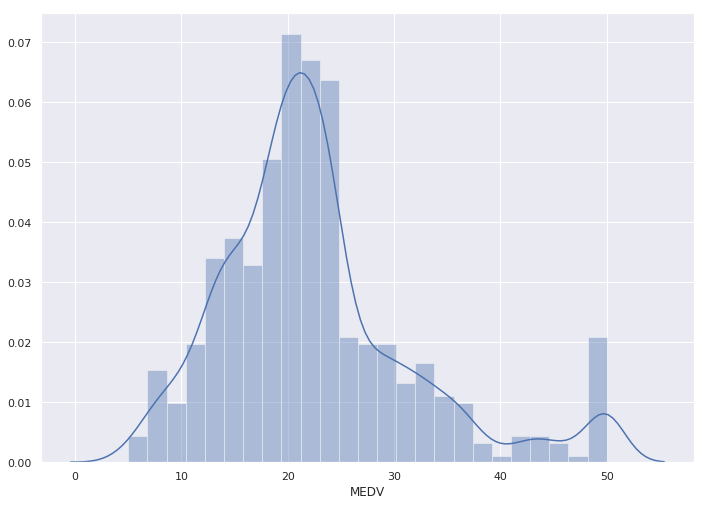

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston["MEDV"], bins = 25)
plt.show()

As you can see, our target variable __MEDV__ follows a normal distribution. However, there are outliers near the upper quantiles.

One of the most important steps in modeling is understanding the relationship our variables have with each other.  A relationship between two variables is also denoted as correlation is statistics.  A figure known as a correlation matrix, can be used to measure the linear relationships between variables.

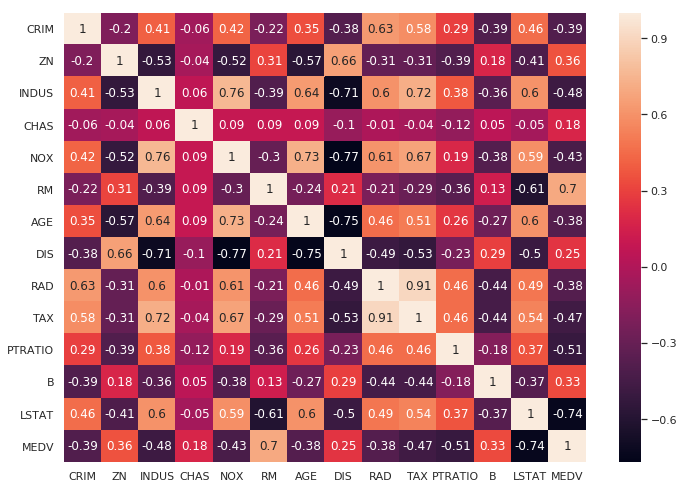

In [15]:
correlation_matrix = boston.corr().round(2)

sns.set(rc={'figure.figsize':(11.7, 8.27)})

sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


Correlation coefficients range from -1 to 1, which determines the strength of correlation.  Values close to 1 signify a strong positive relationship, whereas values close to -1 indicate a strong negative relationship.

With this heatmap, we can see corellation coefficients for each of our potential predictors values and __MEDV__, our target values.  Interestingly, our initial gut instincts of __RM__ and __CRIM__.  __RM's__ coefficient is 0.7, and __CRIM's__ is -0.39, signifying a postive and negative relationship as suggested.

To further investigate individual individual predictors, we can plot their values against the value of __MEDV__.  This with allow us to infer whether or not the relationship is linear, or if further transformations are required.